# Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Loading the Dataset

In [2]:
train=pd.read_csv('email_ctr_train.csv')
test=pd.read_csv('email_ctr_test.csv')

# Analysing the patterns from the datasets

In [3]:
# Checking shape
print(train.shape,'train')
print(test.shape,'test')

(1888, 22) train
(762, 21) test


In [4]:
# Adding both the datasets into a single dataframe for better analysis
df=pd.concat([train,test])

In [5]:
df.head()

,campaign_id,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,times_of_day,category,product,...,is_image,is_personalised,is_quote,is_timer,is_emoticons,is_discount,is_price,is_urgency,target_audience,click_rate
0,1,3,76,10439,39,5,1,Noon,6,26,...,0,0,0,0,0,0,0,0,14,0.103079
1,2,3,54,2570,256,5,1,Morning,2,11,...,0,0,0,0,0,0,0,0,10,0.700000
2,3,3,59,12801,16,5,1,Noon,2,11,...,1,0,1,0,0,0,0,0,16,0.002769
3,4,3,74,11037,30,4,0,Evening,15,9,...,0,0,0,0,0,0,0,0,10,0.010868
4,5,3,80,10011,27,5,1,Noon,6,26,...,0,0,1,0,0,0,0,0,14,0.142826


Top 5 rows of the dataset.

In [6]:
df.tail()

,campaign_id,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,times_of_day,category,product,...,is_image,is_personalised,is_quote,is_timer,is_emoticons,is_discount,is_price,is_urgency,target_audience,click_rate
757,2646,3,72,9081,46,0,0,Evening,15,9,...,0,0,0,0,0,0,0,0,7,NaN
758,2647,3,58,10537,40,3,0,Evening,2,11,...,0,0,0,0,0,0,0,0,16,NaN
759,2648,3,100,9132,19,2,0,Evening,15,9,...,0,0,0,0,0,0,0,0,15,NaN
760,2649,3,88,1451,75,1,0,Noon,2,11,...,0,0,1,0,0,0,0,0,10,NaN
761,2650,3,58,10537,40,0,0,Evening,2,11,...,0,0,0,0,0,0,0,0,1,NaN


Bottom 5 row of the dataset.

In [7]:
# Checking Null values
df.isnull().sum()

campaign_id             0
sender                  0
subject_len             0
body_len                0
mean_paragraph_len      0
day_of_week             0
is_weekend              0
times_of_day            0
category                0
product                 0
no_of_CTA               0
mean_CTA_len            0
is_image                0
is_personalised         0
is_quote                0
is_timer                0
is_emoticons            0
is_discount             0
is_price                0
is_urgency              0
target_audience         0
click_rate            762
dtype: int64

So we have 762 null values because of concatination.

In [8]:
# Dropping Null values
df.dropna(axis=0,inplace=True)

In [9]:
del df['campaign_id']

# EDA Nominal Data

In [10]:
df.columns

Index(['sender', 'subject_len', 'body_len', 'mean_paragraph_len',
       'day_of_week', 'is_weekend', 'times_of_day', 'category', 'product',
       'no_of_CTA', 'mean_CTA_len', 'is_image', 'is_personalised', 'is_quote',
       'is_timer', 'is_emoticons', 'is_discount', 'is_price', 'is_urgency',
       'target_audience', 'click_rate'],
      dtype='object')

3     1559
10     181
15      89
6       22
9       13
14       7
11       7
0        3
12       3
7        2
2        1
1        1
Name: sender, dtype: int64


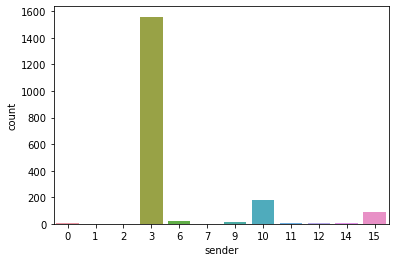

In [11]:
# sender
ax=sns.countplot(x='sender',data=df)
print(df['sender'].value_counts())

3    346
2    333
4    329
1    295
5    237
0    208
6    140
Name: day_of_week, dtype: int64


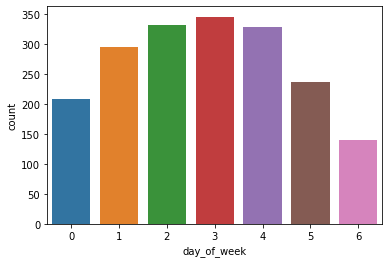

In [12]:
# day_of_week
ax=sns.countplot(x='day_of_week',data=df)
print(df['day_of_week'].value_counts())

There is not much difference between the day_of_week(Day on which email is sent).

0    1511
1     377
Name: is_weekend, dtype: int64


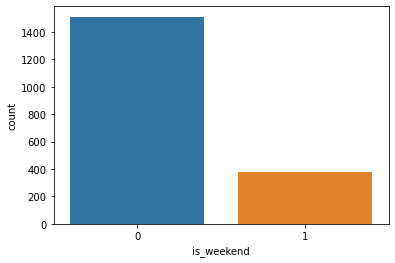

In [13]:
# is_weekend
ax=sns.countplot(x='is_weekend',data=df)
print(df['is_weekend'].value_counts())

There is difference between 0 and 1 in is_weekend(Boolean flag indicating if an email is sent on weekend or not) column.

Evening    1317
Noon        447
Morning     124
Name: times_of_day, dtype: int64


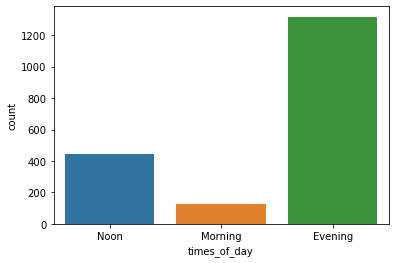

In [14]:
# times_of_day
ax=sns.countplot(x='times_of_day',data=df)
print(df['times_of_day'].value_counts())

Emails in Evening is more.

0    716
1    685
2    442
3     39
6      4
4      2
Name: is_image, dtype: int64


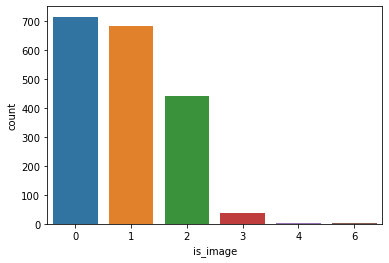

In [15]:
# is_image
ax=sns.countplot(x='is_image',data=df)
print(df['is_image'].value_counts())

There is not much difference between 0 and 1 in is_image(Boolean flag indicating if an email contains an image or not) column.

0    1781
1     107
Name: is_personalised, dtype: int64


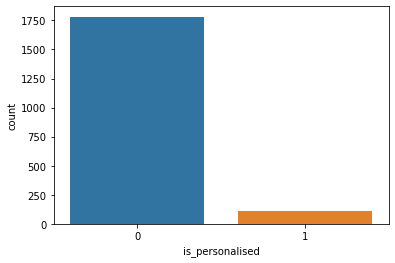

In [16]:
# is_personalised
ax=sns.countplot(x='is_personalised',data=df)
print(df['is_personalised'].value_counts())

In is_personalised(Boolean flag indicating if an email is personalized to the user or not) column there is huge difference between 0 and 1.

0    885
1    638
2    227
3     93
4     27
5     12
6      6
Name: is_quote, dtype: int64


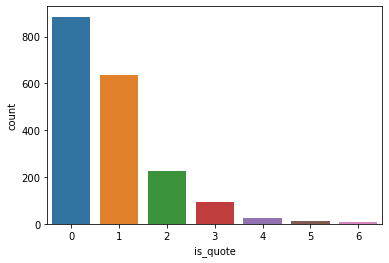

In [17]:
# is_quote
ax=sns.countplot(x='is_quote',data=df)
print(df['is_quote'].value_counts())

In is_quote(Boolean flag indicating if an email contains a quote or not) there is difference.

0    1888
Name: is_timer, dtype: int64


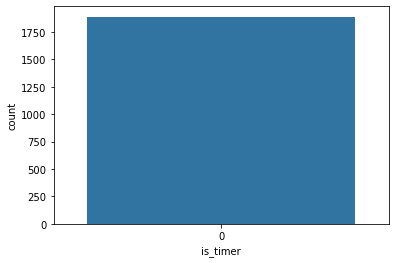

In [18]:
# is_timer
ax=sns.countplot(x='is_timer',data=df)
print(df['is_timer'].value_counts())

There is nothing in is_timer(Boolean flag indicating if an email contains a timer or not) column only a single bar with 1888 values.

0    1626
1     172
2      54
3      30
4       4
6       2
Name: is_emoticons, dtype: int64


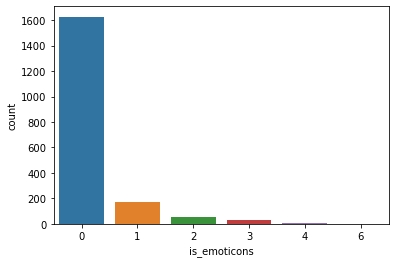

In [19]:
# is_emoticons
ax=sns.countplot(x='is_emoticons',data=df)
print(df['is_emoticons'].value_counts())

Most number of counts are from 0 in is_emoticons(Boolean flag indicating if an email contains emoticons or not) column, other than that all are very less.

0    1813
1      75
Name: is_discount, dtype: int64


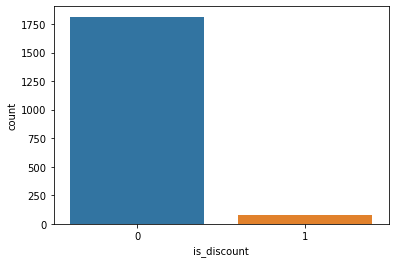

In [20]:
# is_discount
ax=sns.countplot(x='is_discount',data=df)
print(df['is_discount'].value_counts())

There is very huge difference between 0 and 1 in is_discount(Boolean flag indicating if an email contains a discount or not) column.

0        1875
5499        5
8000        2
5000        2
4999        1
1399        1
1000        1
14999       1
Name: is_price, dtype: int64


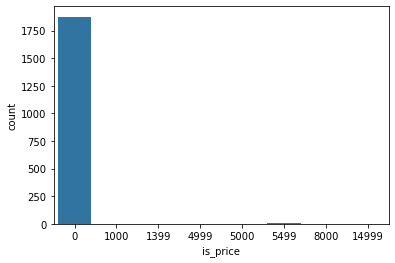

In [21]:
# is_price
ax=sns.countplot(x='is_price',data=df)
print(df['is_price'].value_counts())

0 is showing most number of counts that is 1875 and other than that all are very less in is_price(	
Boolean flag indicating if an email contains price or not) column.

0    1676
1     212
Name: is_urgency, dtype: int64


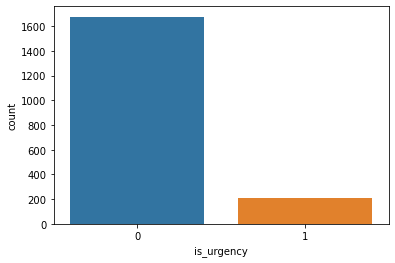

In [22]:
# is_urgency
ax=sns.countplot(x='is_urgency',data=df)
print(df['is_urgency'].value_counts())

There is very huge differnce in is_urgency(Boolean flag indicating if an email contains urgency or not) column.

# EDA Distributed Data

<AxesSubplot:xlabel='subject_len', ylabel='Density'>

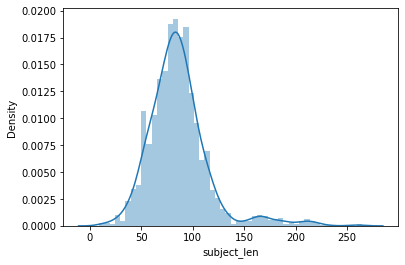

In [23]:
# subject_len
sns.distplot(df['subject_len'])

subject_len are in range from 0 approx 240 with most number of values in between 50 to 150.

<AxesSubplot:xlabel='body_len', ylabel='Density'>

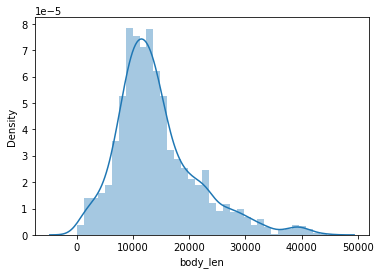

In [24]:
# body_len
sns.distplot(df['body_len'])

body_len are in between 0 to approx 45000 with most number of values in between 0 to 30000 approx.

<AxesSubplot:xlabel='mean_paragraph_len', ylabel='Density'>

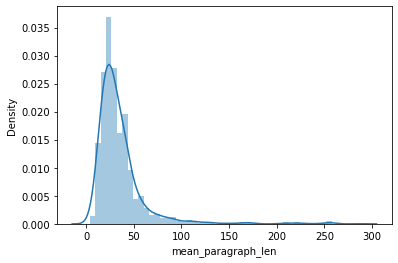

In [25]:
# mean_paragraph_len
sns.distplot(df['mean_paragraph_len'])

mean_paragraph_len are in range from 0 to 125 approx.

<AxesSubplot:xlabel='mean_CTA_len', ylabel='Density'>

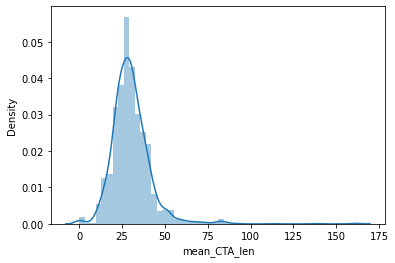

In [26]:
# mean_CTA_len
sns.distplot(df['mean_CTA_len'])

mean_CTA_len are in between 0 to approx 75.

# Encoding object column

In [27]:
from sklearn.preprocessing import OrdinalEncoder
enc =OrdinalEncoder()

for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))

In [28]:
df

,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,times_of_day,category,product,no_of_CTA,...,is_image,is_personalised,is_quote,is_timer,is_emoticons,is_discount,is_price,is_urgency,target_audience,click_rate
0,3,76,10439,39,5,1,2.0,6,26,3,...,0,0,0,0,0,0,0,0,14,0.103079
1,3,54,2570,256,5,1,1.0,2,11,0,...,0,0,0,0,0,0,0,0,10,0.700000
2,3,59,12801,16,5,1,2.0,2,11,3,...,1,0,1,0,0,0,0,0,16,0.002769
3,3,74,11037,30,4,0,0.0,15,9,4,...,0,0,0,0,0,0,0,0,10,0.010868
4,3,80,10011,27,5,1,2.0,6,26,3,...,0,0,1,0,0,0,0,0,14,0.142826
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1883,3,88,1451,75,2,0,2.0,2,11,0,...,0,0,1,0,0,0,0,0,10,0.350746
1884,3,58,10537,40,2,0,0.0,2,11,5,...,0,0,0,0,0,0,0,0,11,0.004728
1885,3,89,11050,26,1,0,0.0,15,9,4,...,0,0,0,0,0,0,0,0,6,0.008289
1886,3,58,10537,40,1,0,0.0,2,11,5,...,0,0,0,0,0,0,0,0,16,0.012014


# Statistical Summary

In [29]:
df.describe()

,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,times_of_day,category,product,no_of_CTA,...,is_image,is_personalised,is_quote,is_timer,is_emoticons,is_discount,is_price,is_urgency,target_audience,click_rate
count,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,...,1888.000000,1888.000000,1888.000000,1888.0,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000
mean,4.395657,86.246292,14185.780191,35.239407,2.828390,0.199682,0.539195,9.949682,17.525424,4.222458,...,0.909958,0.056674,0.834216,0.0,0.210805,0.039725,40.197034,0.112288,11.634534,0.041888
std,3.277927,30.143206,7327.615307,28.139498,1.763193,0.399867,0.849920,5.300719,12.369526,4.628348,...,0.866467,0.231279,1.033901,0.0,0.613442,0.195363,553.957470,0.315804,2.949121,0.084223
min,0.000000,9.000000,23.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,69.000000,9554.500000,21.000000,1.000000,0.000000,0.000000,6.000000,9.000000,2.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,12.000000,0.005413
50%,3.000000,83.000000,12689.000000,29.000000,3.000000,0.000000,0.000000,10.000000,12.000000,3.000000,...,1.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,12.000000,0.010686
75%,3.000000,98.000000,17351.500000,40.000000,4.000000,0.000000,1.000000,15.000000,27.250000,5.000000,...,2.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,12.000000,0.035589
max,15.000000,265.000000,44491.000000,286.000000,6.000000,1.000000,2.000000,15.000000,43.000000,49.000000,...,6.000000,1.000000,6.000000,0.0,6.000000,1.000000,14999.000000,1.000000,16.000000,0.897959


Numbers of values are same in every column.

Not Much differnce between mean and median.

Not much difference between 75% and max.

# Outlier Detection

sender                   AxesSubplot(0.125,0.749828;0.0824468x0.130172)
subject_len           AxesSubplot(0.223936,0.749828;0.0824468x0.130172)
body_len              AxesSubplot(0.322872,0.749828;0.0824468x0.130172)
mean_paragraph_len    AxesSubplot(0.421809,0.749828;0.0824468x0.130172)
day_of_week           AxesSubplot(0.520745,0.749828;0.0824468x0.130172)
is_weekend            AxesSubplot(0.619681,0.749828;0.0824468x0.130172)
times_of_day          AxesSubplot(0.718617,0.749828;0.0824468x0.130172)
category              AxesSubplot(0.817553,0.749828;0.0824468x0.130172)
product                  AxesSubplot(0.125,0.593621;0.0824468x0.130172)
no_of_CTA             AxesSubplot(0.223936,0.593621;0.0824468x0.130172)
mean_CTA_len          AxesSubplot(0.322872,0.593621;0.0824468x0.130172)
is_image              AxesSubplot(0.421809,0.593621;0.0824468x0.130172)
is_personalised       AxesSubplot(0.520745,0.593621;0.0824468x0.130172)
is_quote              AxesSubplot(0.619681,0.593621;0.0824468x0.

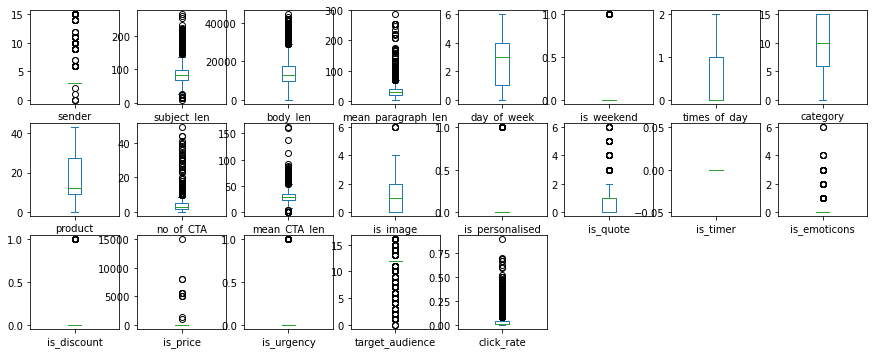

In [30]:
df.plot(kind='box',subplots=True, layout=(5,8), figsize=(15,10))

Some of the outliers are present in the dataset, but we are not treating it due to chances of loosing the dataset.

# Seprating the columns into Feature and Target

In [34]:
x=df.drop('click_rate',axis=1)
y=df['click_rate']

# Train Test Split

In [71]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=.25, random_state=48)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1416, 21)
(472, 21)
(1416,)
(472,)


# Lets bring all features to a common scale

In [43]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

x=sc.fit_transform(df)

x=pd.DataFrame(x,columns=df.columns)

# Model Building

In [44]:
# importing libraries
from sklearn.linear_model import LinearRegression ,Lasso ,Ridge ,ElasticNet
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score

In [45]:
#for Linear Regression

lr=LinearRegression()
lr.fit(x_train,y_train)
pred_y=lr.predict(x_test)
print('r2 score',r2_score(y_test,pred_y))

print('error')
print('mean absolute error', mean_absolute_error(y_test,pred_y))
print('mean squared error', mean_squared_error(y_test,pred_y))

print('root mean squared error', np.sqrt(mean_squared_error(y_test,pred_y)))

r2 score 0.07722135308087708
error
mean absolute error 0.046913063253817576
mean squared error 0.005744331993714749
root mean squared error 0.07579137149910106


In [46]:
# Cross validation Linear Regression
scr=cross_val_score(lr,x,y,cv=5)
print('cross validation score',scr.mean())

cross validation score 1.0


In [47]:
#For Ridge

rd=Ridge()

rd.fit(x_train,y_train)
pred_y=rd.predict(x_test)
print('r2 score',r2_score(y_test,pred_y))

print('error')
print('mean absolute error', mean_absolute_error(y_test,pred_y))
print('mean squared error', mean_squared_error(y_test,pred_y))

print('root mean squared error', np.sqrt(mean_squared_error(y_test,pred_y)))

r2 score 0.07729998794714665
error
mean absolute error 0.04689940289063234
mean squared error 0.005743842488696789
root mean squared error 0.07578814213778293


In [48]:
# For Ridge (cross  validation)


score=cross_val_score(rd,x,y,cv=10)
print('cv score',np.mean(score))

cv score 0.9999995107942379


In [49]:
# for Lasso

ls=Lasso()

ls.fit(x_train,y_train)
pred_y=ls.predict(x_test)
print('r2 score',r2_score(y_test,pred_y))

print('error')
print('mean absolute error', mean_absolute_error(y_test,pred_y))
print('mean squared error', mean_squared_error(y_test,pred_y))

print('root mean squared error', np.sqrt(mean_squared_error(y_test,pred_y)))

r2 score 0.023370191507905647
error
mean absolute error 0.046778912667050296
mean squared error 0.006079557512158539
root mean squared error 0.07797151731343016


In [50]:
# For Lasso (cross validation)


score=cross_val_score(ls,x,y,cv=10)
print('cv score',np.mean(score))

cv score -0.04205364775853262


In [51]:
#For ElasticNet



en=ElasticNet()

en.fit(x_train,y_train)
pred_y=en.predict(x_test)
print('r2 score',r2_score(y_test,pred_y))

print('error')
print('mean absolute error', mean_absolute_error(y_test,pred_y))
print('mean squared error', mean_squared_error(y_test,pred_y))

print('root mean squared error', np.sqrt(mean_squared_error(y_test,pred_y)))

r2 score 0.022794067856392264
error
mean absolute error 0.046774556346256824
mean squared error 0.006083143903688916
root mean squared error 0.07799451201006977


In [52]:
#For ElasticNet (cross validation)

score=cross_val_score(en,x,y,cv=10)
print('cv score',np.mean(score))

cv score -0.04205364775853262


# ENSEMBLE TECHNIQUE

In [53]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
parameters={'criterion':['mse','mae'],'max_features':['auto','sqrt','log2']}

rf=RandomForestRegressor()
clf=GridSearchCV(rf,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'criterion': 'mse', 'max_features': 'sqrt'}


In [54]:
rf=RandomForestRegressor(criterion='mae',max_features='auto')
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
pred_decision=rf.predict(x_test)

rfs=r2_score(y_test,pred_decision)
print('r2 score:', rfs*100)

rfscore=cross_val_score(rf,x,y,cv=5)
rfc=rfscore.mean()
print('cross val score',rfc*100)

r2 score: 41.307813639628996
cross val score 99.49349796354457


So we are getting 99.49% r2 score.

# Prediction on Test Data

In [94]:
test=pd.read_csv('email_ctr_test.csv')

In [95]:
test

,campaign_id,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,times_of_day,category,product,...,mean_CTA_len,is_image,is_personalised,is_quote,is_timer,is_emoticons,is_discount,is_price,is_urgency,target_audience
0,1889,3,61,12871,11,6,1,Noon,6,26,...,37,1,0,0,0,1,0,0,0,14
1,1890,3,54,2569,256,5,1,Morning,2,11,...,22,0,0,0,0,0,0,0,0,10
2,1891,3,88,1473,78,4,0,Evening,2,11,...,22,1,0,1,0,0,0,0,0,10
3,1892,3,88,1473,78,3,0,Evening,2,11,...,22,1,0,1,0,0,0,0,0,10
4,1893,3,78,9020,29,3,0,Noon,6,26,...,40,0,0,0,0,0,0,0,0,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
757,2646,3,72,9081,46,0,0,Evening,15,9,...,28,0,0,0,0,0,0,0,0,7
758,2647,3,58,10537,40,3,0,Evening,2,11,...,27,0,0,0,0,0,0,0,0,16
759,2648,3,100,9132,19,2,0,Evening,15,9,...,23,0,0,0,0,0,0,0,0,15
760,2649,3,88,1451,75,1,0,Noon,2,11,...,22,0,0,1,0,0,0,0,0,10


In [99]:
# Encoding object column
from sklearn.preprocessing import OrdinalEncoder
enc =OrdinalEncoder()

for i in test.columns:
    if test[i].dtypes=='object':
        test[i]=enc.fit_transform(test[i].values.reshape(-1,1))

In [97]:

model = RandomForestRegressor()
model.fit(x,y)

RandomForestRegressor()

In [100]:
# Prediction
pred = model.predict(test)
pred

array([0.82283954, 0.82305496, 0.82331137, 0.82331137, 0.82078302,
       0.46679461, 0.82283954, 0.12569681, 0.82283954, 0.46679461,
       0.46690698, 0.21052953, 0.66654319, 0.82283954, 0.82283954,
       0.82283954, 0.82283954, 0.82283954, 0.82283741, 0.82078302,
       0.82283741, 0.12570753, 0.50227415, 0.82078302, 0.82078089,
       0.27923585, 0.82283954, 0.82283954, 0.82305496, 0.82283741,
       0.82283741, 0.82078302, 0.71635302, 0.82293315, 0.66654319,
       0.82283954, 0.82283954, 0.82283954, 0.82283954, 0.82283954,
       0.82283954, 0.82283954, 0.82246131, 0.82283954, 0.82283954,
       0.82283741, 0.82078089, 0.82283954, 0.82078302, 0.8204048 ,
       0.82283741, 0.82283954, 0.82283954, 0.82078089, 0.82283954,
       0.82246131, 0.82283954, 0.46690698, 0.82283954, 0.82283741,
       0.82283954, 0.82283741, 0.82283741, 0.82283954, 0.82283741,
       0.82283954, 0.82283954, 0.82078302, 0.82283741, 0.82246131,
       0.82245918, 0.82293315, 0.82040267, 0.82283954, 0.82283

In [101]:
len(pred)

762

# Submission

In [102]:
submission=pd.read_csv("sample_submission_LJ2N3ZQ.csv")

In [104]:
submission['click_rate']=pred
submission['campaign_id']=test['campaign_id']

In [105]:
# Creating DataFrame
pd.DataFrame(submission, columns=['campaign_id','click_rate']).to_csv('email_click_rate.csv')

# Result

In [106]:
# result
f=pd.read_csv('email_click_rate.csv')
f.head()

,Unnamed: 0,campaign_id,click_rate
0,0,1889,0.822840
1,1,1890,0.823055
2,2,1891,0.823311
3,3,1892,0.823311
4,4,1893,0.820783
